In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [2]:
header = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv('data/cars/car.data' ,names=header)

#header = ['class', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
#df = pd.read_csv('letter_recognition/letter-recognition.data', names=header)

df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
# подсчёт сэмплов каждого класса
def calc_classes_exmpls(dataframe):
    for cls in dataframe['class'].unique():
        print(f"{cls}: {len(dataframe[dataframe['class'] == cls])}")

In [4]:
for column in df.columns:
    print(f"For columns '{column}' unique values are {df[column].unique()}")
print()
calc_classes_exmpls(df)

For columns 'buying' unique values are ['vhigh' 'high' 'med' 'low']
For columns 'maint' unique values are ['vhigh' 'high' 'med' 'low']
For columns 'doors' unique values are ['2' '3' '4' '5more']
For columns 'persons' unique values are ['2' '4' 'more']
For columns 'lug_boot' unique values are ['small' 'med' 'big']
For columns 'safety' unique values are ['low' 'med' 'high']
For columns 'class' unique values are ['unacc' 'acc' 'vgood' 'good']

unacc: 1210
acc: 384
vgood: 65
good: 69


In [21]:
le = preprocessing.LabelEncoder()
original_classes = np.unique(df['class'].values)
for column_name in df.columns:
    df[column_name] = le.fit_transform(df[column_name])
y = df['class']
X = df.loc[:, df.columns != 'class']
x = X.to_numpy()

In [6]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


## K-Means

Проблемка - датасет про машины как-то странно класеризуется. Примерно никак. Возможно это из-за категориальных признаков, но хз

In [42]:
from sklearn.datasets import load_iris
iris_ds = load_iris()
X_iris = iris_ds['data']
y_iris = iris_ds['target']

In [69]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=10)
clusters = kmeans.fit_predict(X_iris)

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X_new = SelectKBest(f_classif, k=2).fit_transform(X, y)


In [45]:
def plot_clusters(x: np.ndarray, clusters: np.ndarray, features: tuple):
    plt.figure(figsize=(10, 10))
    f1, f2 = features
    cluster_list = np.unique(clusters)
    for c in cluster_list:
        plt.scatter(x[clusters == c, f1], x[clusters == c, f2], s=100, label=f'Claster {c}')
    plt.legend()
    plt.show()

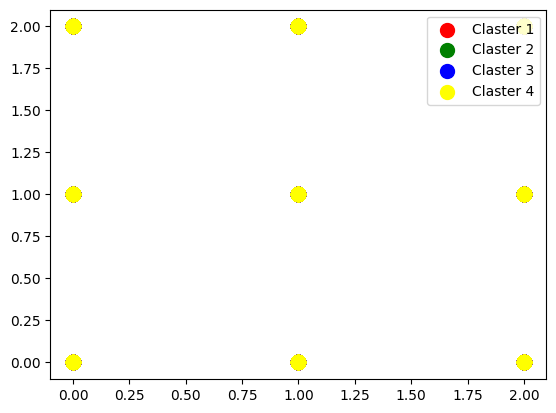

In [41]:
plt.scatter(x[clusters == 0, 3], x[clusters == 0, 5], s=100, c='red', label=f'Claster {1}')
plt.scatter(x[clusters == 1, 3], x[clusters == 1, 5], s=100, c='green',label=f'Claster {2}')
plt.scatter(x[clusters == 2, 3], x[clusters == 2, 5], s=100, c='blue',label=f'Claster {3}')
plt.scatter(x[clusters == 3, 3], x[clusters == 3, 5], s=100, c='yellow',label=f'Claster {4}')
plt.legend()
plt.show()

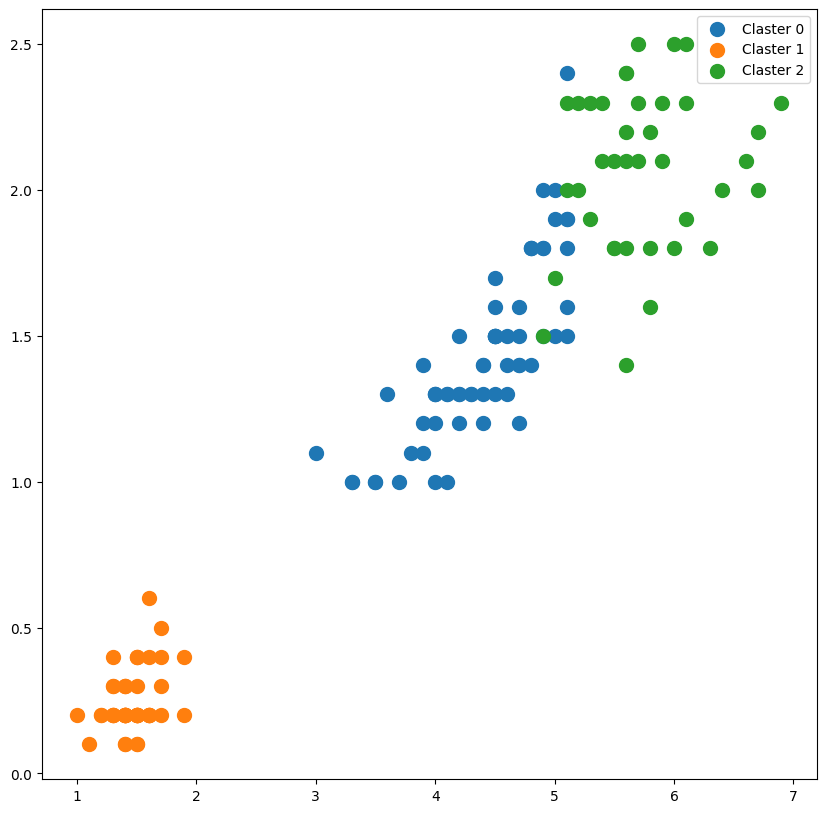

In [70]:
plot_clusters(X_iris, clusters, (2,3))

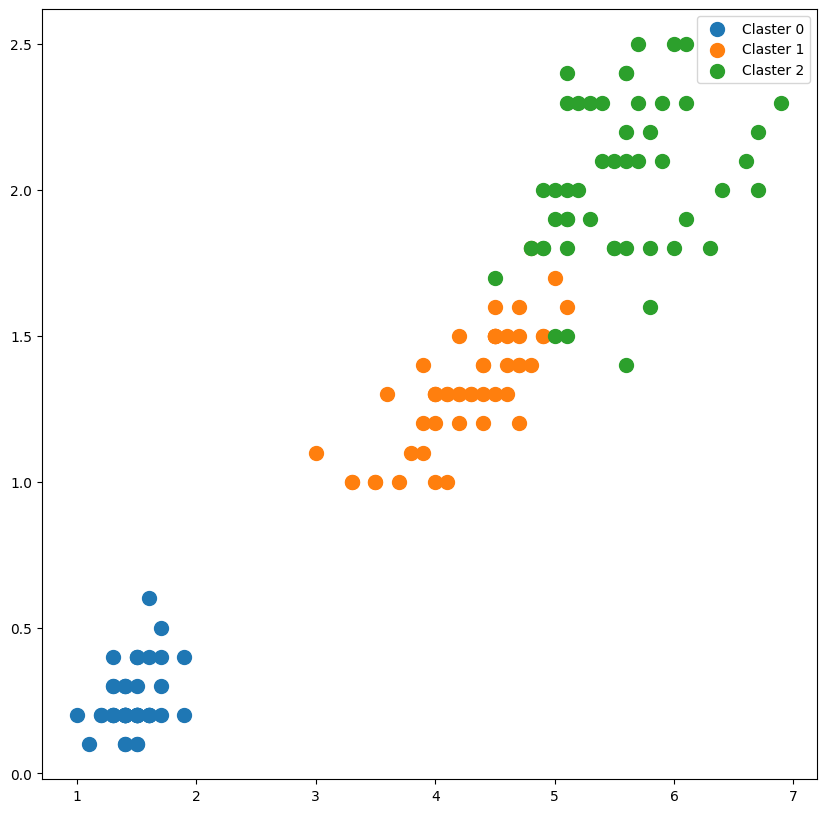

In [68]:
plot_clusters(X_iris, y_iris, (2,3))

## DB-Scan

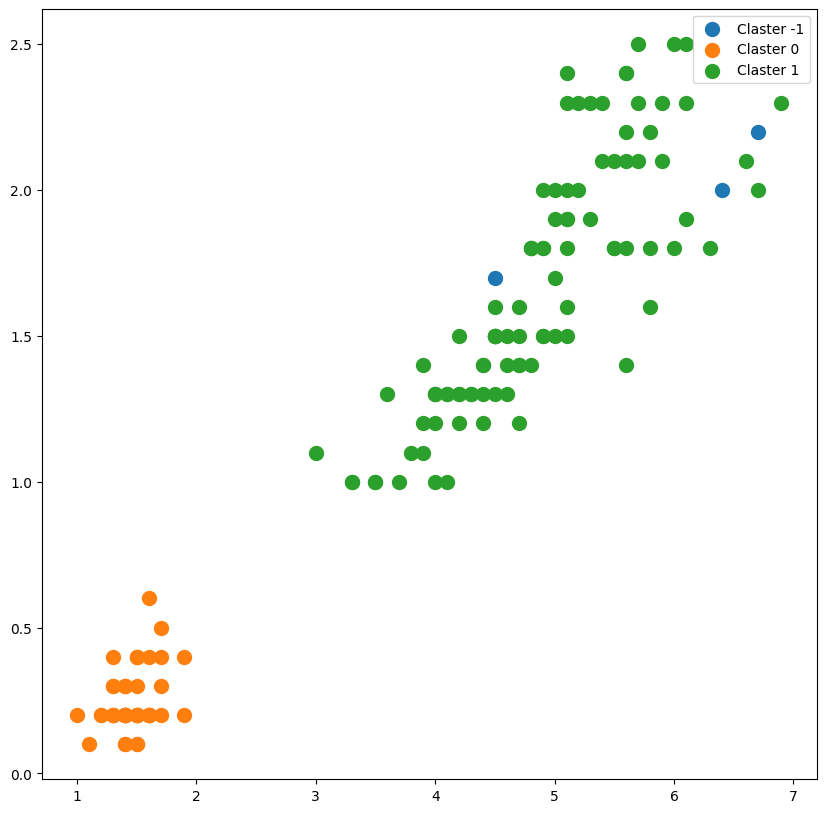

In [76]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)
clusters = dbscan.fit_predict(X_iris, y_iris)

plot_clusters(X_iris, clusters, (2, 3))

## Иерархическая кластеризация

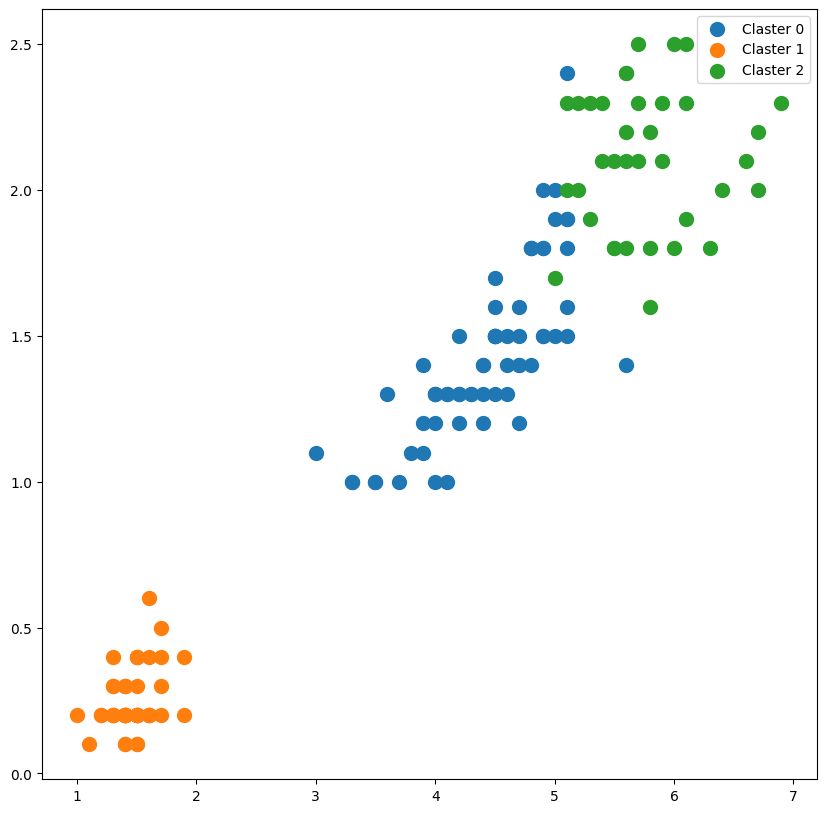

In [83]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=None, compute_full_tree=True, distance_threshold=7)
clusters = agg_clustering.fit_predict(X_iris, y_iris)

plot_clusters(X_iris, clusters, (2,3))

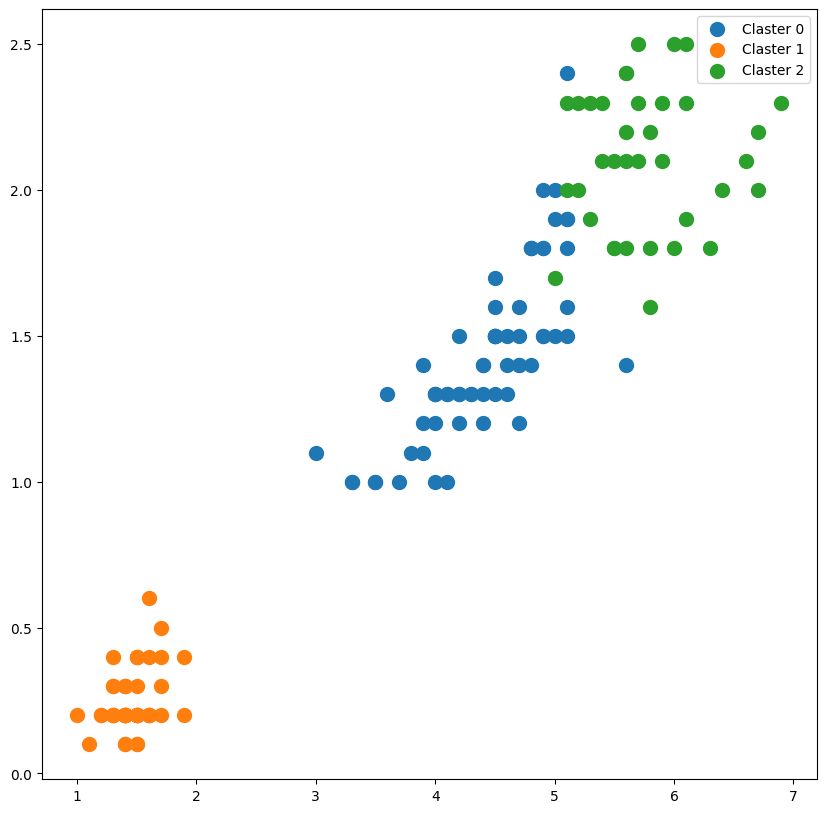

In [84]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3, compute_full_tree=False, distance_threshold=None)
clusters = agg_clustering.fit_predict(X_iris, y_iris)

plot_clusters(X_iris, clusters, (2,3))

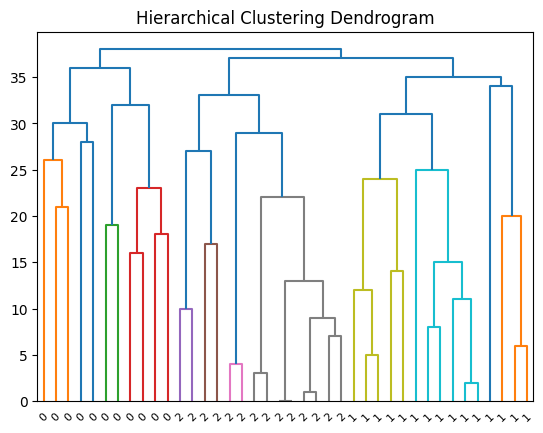

In [86]:
# https://stackoverflow.com/questions/29127013/plot-dendrogram-using-sklearn-agglomerativeclustering

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
x = iris.data[:40]
model = AgglomerativeClustering(n_clusters=3)

model = model.fit(x)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=model.labels_)
plt.show()